# visualization

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [3]:
# simulated data
rng = default_rng()
x = rng.normal(size = 100)  
y = rng.normal(size = 100) 
Data = pd.DataFrame({'x':x, 'y':y})
Data['xSign'] = (Data.x > 0 )

# Line Plot

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'idx')

Text(0, 0.5, 'x')

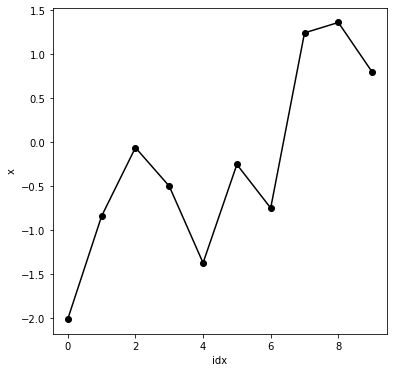

In [4]:
plt.figure(figsize = (6, 6))
plt.plot(x[:10], marker = 'o', color = 'k')
plt.xlabel('idx')
plt.ylabel('x')
plt.show()

### geom_line()

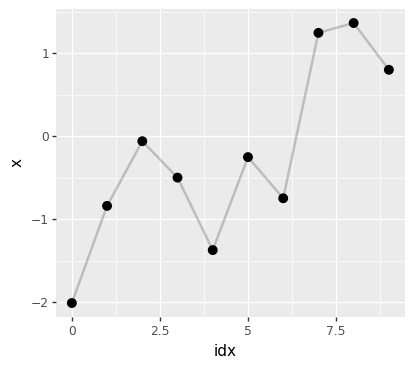

<ggplot: (8738915921233)>

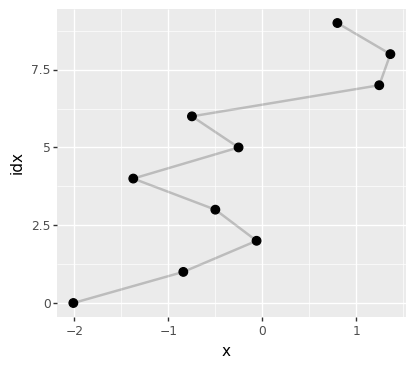

<ggplot: (8738913662397)>

In [5]:
p = ggplot(pd.DataFrame({'x':x[:10]}), aes(np.arange(10), 'x')) +\
  geom_line(linetype = 'solid', size = 1, alpha = 0.2) +\
  geom_point(size = 3, color = 'black') +\
  xlab('idx') + ylab('x')+\
  theme(figure_size = (4.5, 4))

p
p + coord_flip() 

# Bar Plot: Single-Column

<BarContainer object of 10 artists>

Text(0.5, 0, 'idx')

Text(0, 0.5, 'x')

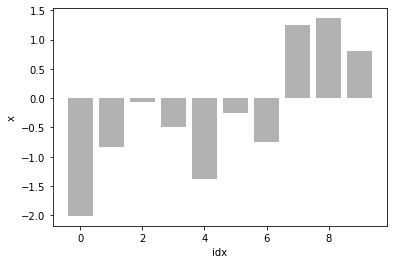

In [6]:
plt.bar(np.arange(10), x[:10], color = 'black', alpha = 0.3)
plt.xlabel('idx')
plt.ylabel('x')
plt.show()

### geom_col()

# Bar Plot: Double-Column

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, 'index')

Text(0, 0.5, 'value')

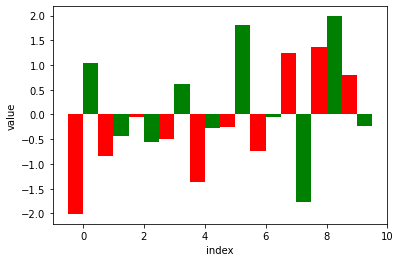

In [7]:
width = 0.5
plt.bar([_ - width*0.5 for _ in np.arange(10)], x[:10], width, color = 'r')
plt.bar([_ + width*0.5 for _ in np.arange(10)], y[:10], width, color = 'g')
plt.xlabel('index')
plt.ylabel('value')
plt.show()

### geom_bar()

In [8]:
# we can use the following dataframe for ggplot()
df = pd.DataFrame(np.r_[x[:10], y[:10]], columns =['val'])
df['label'] = 'x'
df.loc[10:20, 'label'] = 'y'
df['idx'] = np.arange(20)
df.loc[10:20, 'idx'] = np.arange(10)
df

,val,label,idx
0,-2.010432,x,0
1,-0.840010,x,1
2,-0.060530,x,2
3,-0.499237,x,3
4,-1.372617,x,4
5,-0.252161,x,5
6,-0.748154,x,6
7,1.245115,x,7
8,1.363587,x,8
9,0.799692,x,9


# Scatter Plot

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

Text(0.5, 1.0, 'Plot of X vs Y')

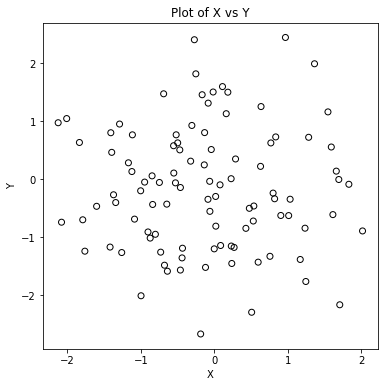

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(Data.x, Data.y, facecolors = 'none', edgecolors = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of X vs Y')

#plt.savefig('Figure_py.pdf')
#plt.savefig('Figure_py.png')

plt.show()

### geom_points()

# Contour Plot

<a list of 14 text.Text objects>

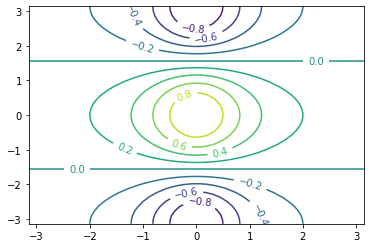

In [10]:
x = np.linspace(-np.pi, np.pi, 50)
y = x

X, Y = np.meshgrid(x, y)

Z = np.cos(Y) / (1 + X**2)

p = plt.contour(X, Y, Z, levels = 10)
plt.clabel(p)
plt.show()

In [11]:
# plotnine does not have geom_contour(), skip this one

# Heatmap

<Figure size 432x432 with 0 Axes>

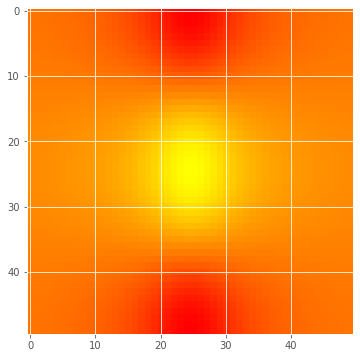

In [12]:
# heat map
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.imshow(Z, cmap = 'autumn', interpolation = 'none')
plt.show()

### geom_raster()

# Surface Plot

Text(0.5, 0.92, '3D plot, wireframe')

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

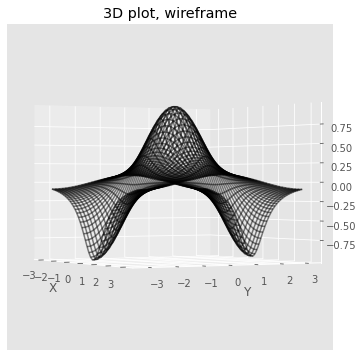

In [13]:
# 3D plot
fig = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = '3d', azim = -30, elev = 0)
ax.plot_wireframe(X, Y, Z,  color = 'k', alpha = 0.5)
ax.set_title('3D plot, wireframe')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [14]:
# GGplot is mostly 2D,  skip this one

In [15]:
# Load Auto.data
Auto = pd.read_csv('Auto.data', sep = '\s+', header = 0, na_values = '?') 
Auto.dropna(inplace = True)

# Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2afd257a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2afd284040>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f2afd2577c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2afd2845e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2afd2848b0>,
 'means': []}

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'mpg')

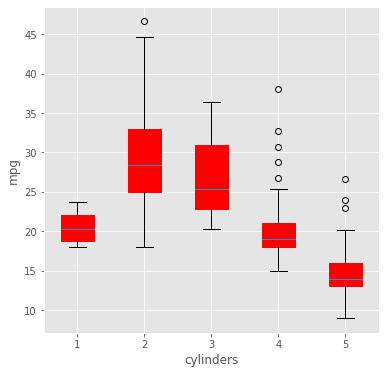

In [16]:
#hardwired for now

mpg_cyl3 = Auto.mpg[Auto.cylinders == 3].values
mpg_cyl4 = Auto.mpg[Auto.cylinders == 4].values
mpg_cyl5 = Auto.mpg[Auto.cylinders == 5].values
mpg_cyl6 = Auto.mpg[Auto.cylinders == 6].values
mpg_cyl8 = Auto.mpg[Auto.cylinders == 8].values



fig = plt.figure(figsize = (6, 6))
plt.boxplot([mpg_cyl3, mpg_cyl4, mpg_cyl5, mpg_cyl6, mpg_cyl8],\
            patch_artist = True, boxprops = dict(facecolor = 'r', color = 'r'))
plt.xlabel('cylinders')
plt.ylabel('mpg')

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2afc134490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2afc134a30>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f2afc1340d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2afc134fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2afc1352a0>,
 'means': []}

Text(0, 0.5, 'cylinders')

Text(0.5, 0, 'mpg')

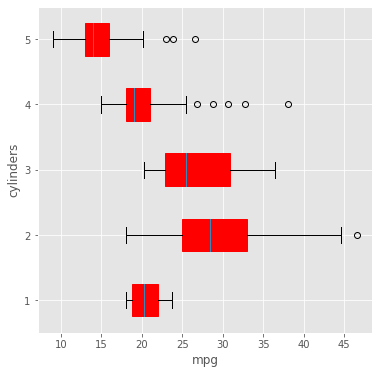

In [17]:
fig = plt.figure(figsize = (6, 6))
plt.boxplot([mpg_cyl3, mpg_cyl4, mpg_cyl5, mpg_cyl6, mpg_cyl8], vert = False,\
            patch_artist = True, boxprops = dict(facecolor = 'r', color = 'r'))
plt.ylabel('cylinders')
plt.xlabel('mpg')

plt.show()

### geom_boxplot()
use + coord_flip() to switch between vertical and horizontal boxplots

# Histogram

Text(0.5, 0, 'mpg')

Text(0, 0.5, 'count')

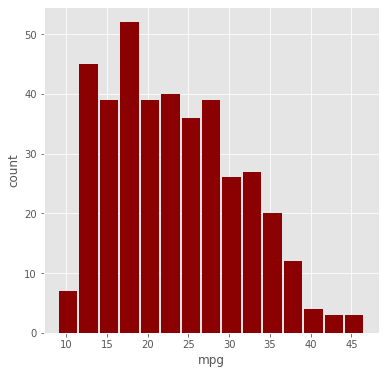

In [18]:
fig = plt.figure(figsize = (6, 6))
n, bins, patches = plt.hist(x = Auto.mpg.values, bins = 15, color='darkred', rwidth = 0.9)
plt.xlabel('mpg')
plt.ylabel('count')
plt.show()

### geom_histogram()

# Pairs Plot

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='horsepower', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='horsepower'>,
        <AxesSubplot:xlabel='displacement', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>]],
      dtype=object)

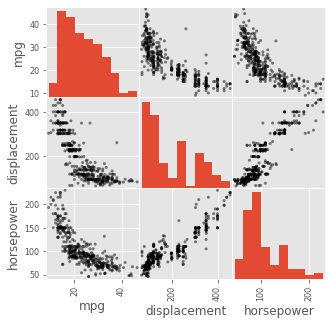

In [19]:
pd.plotting.scatter_matrix(Auto[['mpg','displacement','horsepower']],\
                           figsize = (5, 5), color = 'k', alpha=0.5)

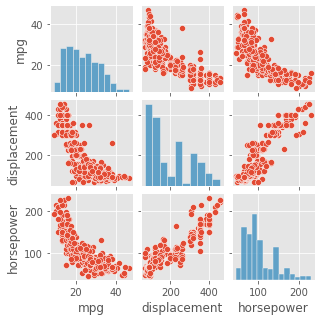

In [20]:
sns.pairplot(Auto[['mpg','displacement','horsepower']], diag_kind = 'hist', height = 1.5)

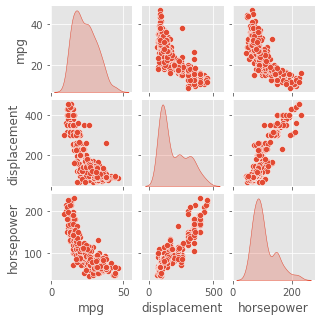

In [21]:
sns.pairplot(Auto[['mpg','displacement','horsepower']], diag_kind = 'kde', height = 1.5)

In [22]:
# plotnine does not have pairs plot, skip this one